In [56]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
plt.rcParams['figure.figsize'] = (15.0, 8.0)

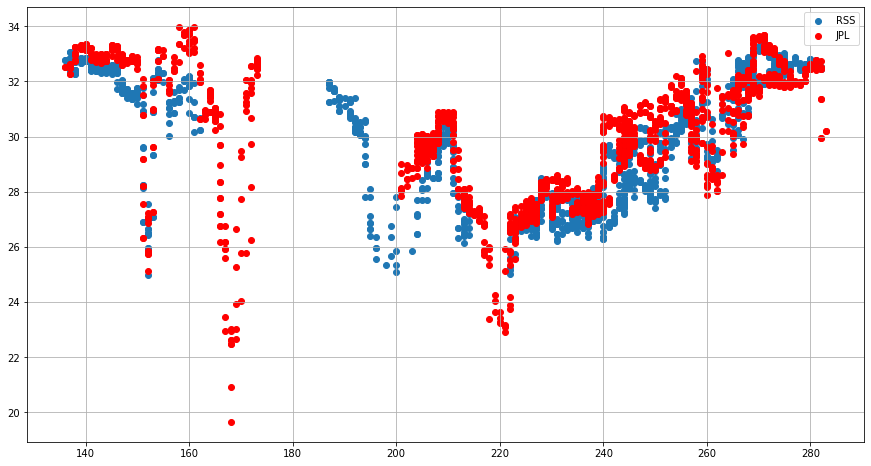

In [57]:
adir_data = 'F:/data/cruise_data/saildrone/sss/sss_collocations_8day_nearest_norepeat/'
saildrone_filenames_rss = glob(adir_data+'*arctic_misst*rss*.nc')
#print(saildrone_filenames_rss)
saildrone_filenames_jpl = glob(adir_data+'*arctic_misst*jpl*.nc')
ds=[]
for iusv in range(2):
    fname=saildrone_filenames_rss[iusv]
    ds_usv=xr.open_dataset(fname)#.swap_dims({'ob':'time'})#.isel(trajectory=0).swap_dims({'obs':'time'})
    ds_usv.close()
    ds_usv=ds_usv.where(ds_usv.sat_sss_smap>10)
    ds.append(ds_usv)
ds_saildrone_rss = xr.concat(ds,dim='trajectory')
ds=[]
for iusv in range(2):
    fname=saildrone_filenames_jpl[iusv]
    ds_usv=xr.open_dataset(fname)#.swap_dims({'ob':'time'})#.isel(trajectory=0).swap_dims({'obs':'time'})
    ds_usv.close()
    ds_usv=ds_usv.where(ds_usv.sat_smap_sss>10)
    ds.append(ds_usv)
ds_saildrone_jpl = xr.concat(ds,dim='trajectory')
plt.scatter(ds_saildrone_rss.time.dt.dayofyear,ds_saildrone_rss.sat_sss_smap,label='RSS') #sat_smap_sss)
plt.scatter(ds_saildrone_jpl.time.dt.dayofyear,ds_saildrone_jpl.sat_smap_sss,c='r',label='JPL') #sat_smap_sss)
plt.grid()
plt.legend()
plt.savefig('f:\sss_fig4_norepeat.png')

In [63]:
adir_data = 'F:/data/cruise_data/saildrone/sss/sss_collocations_8day_nearest/'
saildrone_filenames_rss = glob(adir_data+'*arctic_misst*rss*.nc')
#print(saildrone_filenames_rss)
saildrone_filenames_jpl = glob(adir_data+'*arctic_misst*jpl*.nc')
ds=[]
for iusv in range(2):
    fname=saildrone_filenames_rss[iusv]
    ds_usv=xr.open_dataset(fname)#.swap_dims({'ob':'time'})#.isel(trajectory=0).swap_dims({'obs':'time'})
    ds_usv.close()
#    ds_usv=ds_usv.where(ds_usv.sat_sss_smap>10)
    ds.append(ds_usv)
ds_saildrone_rss = xr.concat(ds,dim='trajectory')
ds=[]
for iusv in range(2):
    fname=saildrone_filenames_jpl[iusv]
    ds_usv=xr.open_dataset(fname)#.swap_dims({'ob':'time'})#.isel(trajectory=0).swap_dims({'obs':'time'})
    ds_usv.close()
#    ds_usv=ds_usv.where(ds_usv.sat_smap_sss>10)
    ds.append(ds_usv)
ds_saildrone_jpl = xr.concat(ds,dim='trajectory')
for iusv in range(1):
    plt.plot(ds_saildrone_rss.time.dt.dayofyear,ds_saildrone_rss.sat_sss_smap[iusv,:],label='RSS') #sat_smap_sss)
    plt.plot(ds_saildrone_jpl.time.dt.dayofyear,ds_saildrone_jpl.sat_smap_sss[iusv,:],c='r',label='JPL') #sat_smap_sss)
    plt.plot(ds_saildrone_jpl.time.dt.dayofyear,ds_saildrone_jpl.SAL_CTD_MEAN[iusv,:],c='k',label='JPL') #sat_smap_sss)
plt.grid()
plt.legend()
plt.savefig('f:\sss_fig4.png')

In [59]:
ds_saildrone_rss

<xarray.Dataset>
Dimensions:                       (time: 215731, trajectory: 2)
Coordinates:
    lat                           (trajectory, time) float64 53.85 ... 53.84
    lon                           (trajectory, time) float64 -166.6 ... -166.6
  * time                          (time) datetime64[ns] 2019-05-14T23:00:00 ....
  * trajectory                    (trajectory) object '1036' '1037'
Data variables:
    SOG_MEAN                      (trajectory, time) float64 nan nan ... nan nan
    COG_MEAN                      (trajectory, time) float64 nan nan ... nan nan
    HDG_MEAN                      (trajectory, time) float64 nan nan ... nan nan
    ROLL_MEAN                     (trajectory, time) float64 nan nan ... nan nan
    PITCH_MEAN                    (trajectory, time) float64 nan nan ... nan nan
    UWND_MEAN                     (trajectory, time) float64 nan nan ... nan nan
    VWND_MEAN                     (trajectory, time) float64 nan nan ... nan nan
    WWND_MEAN                     (trajectory, time) float64 nan nan ... nan nan
    GUST_WND_MEAN                 (trajectory, time) float64 nan nan ... nan nan
    WIND_MEASUREMENT_HEIGHT_MEAN  (trajectory, time) float64 nan nan ... nan nan
    TEMP_AIR_MEAN                 (trajectory, time) float64 nan nan ... nan nan
    RH_MEAN                       (trajectory, time) float64 nan nan ... nan nan
    BARO_PRES_MEAN                (trajectory, time) float64 nan nan ... nan nan
    PAR_AIR_MEAN                  (trajectory, time) float64 nan nan ... nan nan
    TEMP_CTD_MEAN                 (trajectory, time) float64 nan nan ... nan nan
    TEMP_CTD_STDDEV               (trajectory, time) float64 nan nan ... nan nan
    SAL_CTD_MEAN                  (trajectory, time) float64 nan nan ... nan nan
    TEMP_RBR_MEAN                 (trajectory, time) float64 nan nan ... nan nan
    SAL_RBR_MEAN                  (trajectory, time) float64 nan nan ... nan nan
    CHLOR_WETLABS_MEAN            (trajectory, time) float64 nan nan ... nan nan
    CHLOR_MEAN                    (trajectory, time) float64 nan nan ... nan nan
    TEMP_O2_RBR_MEAN              (trajectory, time) float64 nan nan ... nan nan
    CDOM_MEAN                     (trajectory, time) float64 nan nan ... nan nan
    sat_nobs                      (trajectory, time) float64 nan nan ... nan nan
    sat_nobs_40km                 (trajectory, time) float64 nan nan ... nan nan
    sat_sss_smap                  (trajectory, time) float32 nan nan ... nan nan
    sat_sss_smap_uncertainty      (trajectory, time) float32 nan nan ... nan nan
    sat_sss_smap_40km             (trajectory, time) float32 nan nan ... nan nan
    sat_sss_ref                   (trajectory, time) float32 nan nan ... nan nan
    sat_gland                     (trajectory, time) float32 nan nan ... nan nan
    sat_fland                     (trajectory, time) float32 nan nan ... nan nan
    sat_gice                      (trajectory, time) float32 nan nan ... nan nan
    sat_surtep                    (trajectory, time) float32 nan nan ... nan nan
    sat_lat                       (trajectory, time) float64 nan nan ... nan nan
    sat_lon                       (trajectory, time) float64 nan nan ... nan nan
Attributes:
    title:                     Arctic NASA MISST 2019 Mission
    summary:                   Saildrone surface observational data for the N...
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3
    netcdf_version:            4.6.3
    featureType:               trajectory
    cdm_data_type:             Trajectory
    standard_name_vocabulary:  CF Standard Name Table v58
    description:               Saildrone NetCDF Format
    creator_name:              Saildrone
    platform:                  Saildrone
    institution:               Saildrone
    creator_email:             support@saildrone.com
    creator_url:               https://saildrone.com/
    date_create